Bryan Jay - 260738764

# 2 - Image Classification 
### 2.1 Coding Questions



### Training
##### Q1 - Resize Images 

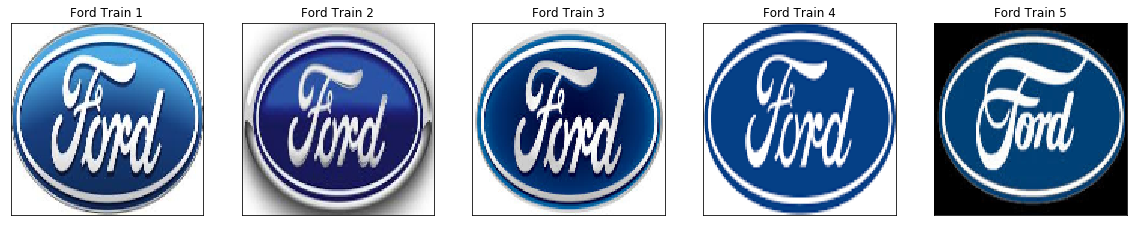

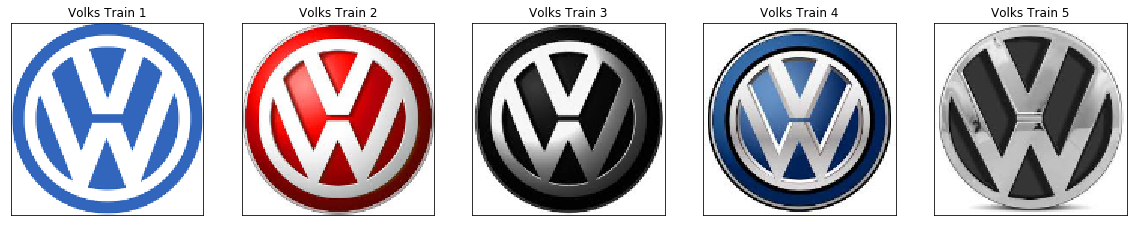

In [3]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# read all the images into a list and resize images
ford_train = list()
volks_train = list()

ford_train.append(cv2.resize(cv2.imread('./dataset/ford_train1.jpeg'), (128, 128)))
ford_train.append(cv2.resize(cv2.imread('./dataset/ford_train2.jpeg'), (128, 128)))
ford_train.append(cv2.resize(cv2.imread('./dataset/ford_train3.jpeg'), (128, 128)))
ford_train.append(cv2.resize(cv2.imread('./dataset/ford_train4.png'), (128, 128)))
ford_train.append(cv2.resize(cv2.imread('./dataset/ford_train5.jpeg'), (128, 128)))

volks_train.append(cv2.resize(cv2.imread('./dataset/volks_train1.png'), (128, 128)))
volks_train.append(cv2.resize(cv2.imread('./dataset/volks_train2.jpeg'), (128, 128)))
volks_train.append(cv2.resize(cv2.imread('./dataset/volks_train3.jpeg'), (128, 128)))
volks_train.append(cv2.resize(cv2.imread('./dataset/volks_train4.jpeg'), (128, 128)))
volks_train.append(cv2.resize(cv2.imread('./dataset/volks_train5.jpeg'), (128, 128)))

plt.figure(figsize=(20,20))
subplot_i = 151
for i in range(len(ford_train)):
    plt.subplot(subplot_i+i), plt.imshow(cv2.cvtColor(ford_train[i], cv2.COLOR_BGR2RGB))
    index = i + 1
    plt.title('Ford Train ' + str(index)), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
subplot_i = 151
for i in range(len(volks_train)):
    plt.subplot(subplot_i+i), plt.imshow(cv2.cvtColor(volks_train[i], cv2.COLOR_BGR2RGB))
    index = i + 1
    plt.title('Volks Train ' + str(index)), plt.xticks([]), plt.yticks([])
plt.show()


##### Q2 - Compute HoG Features 

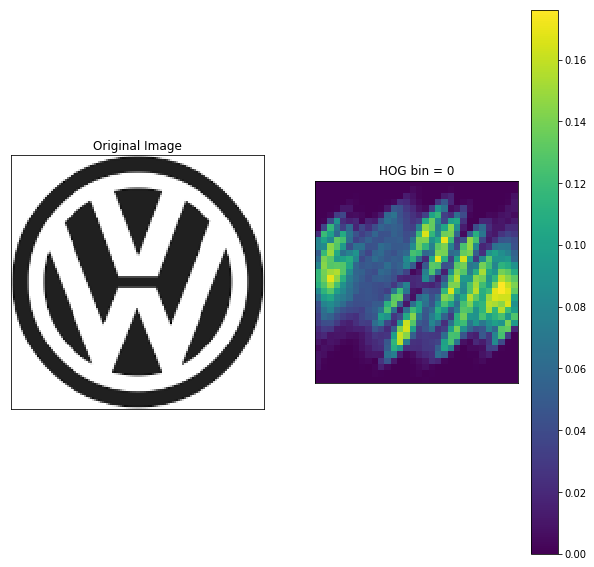

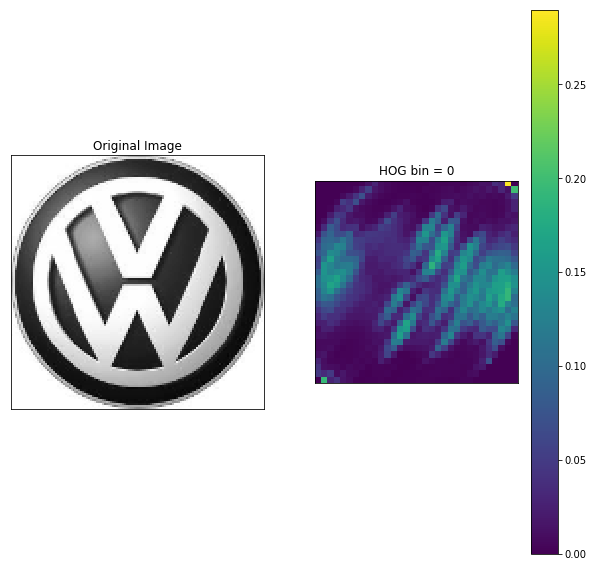

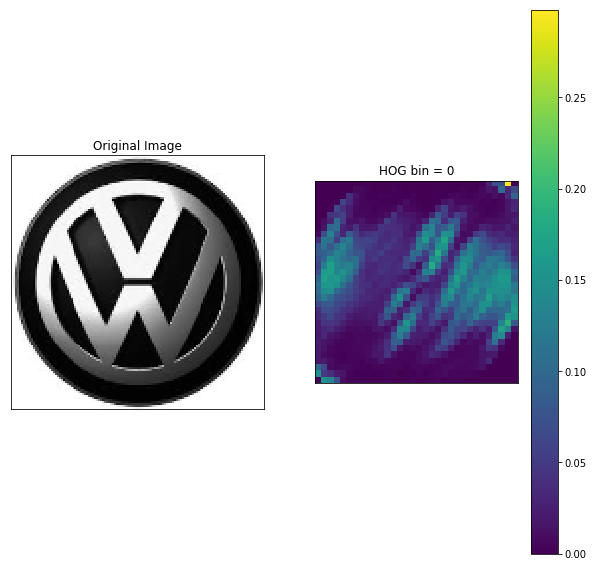

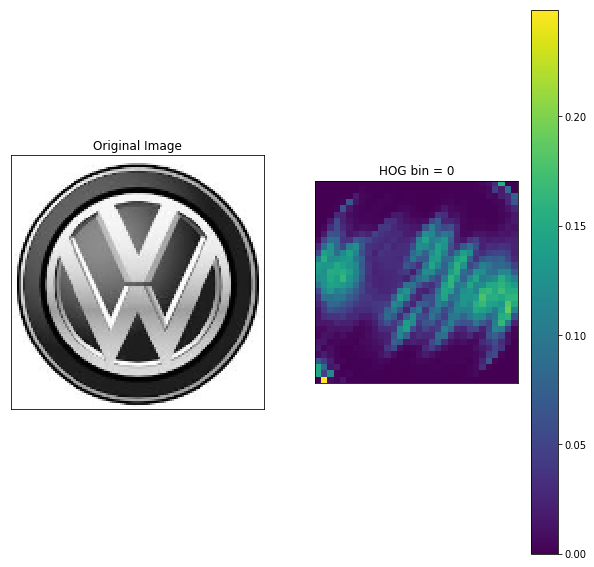

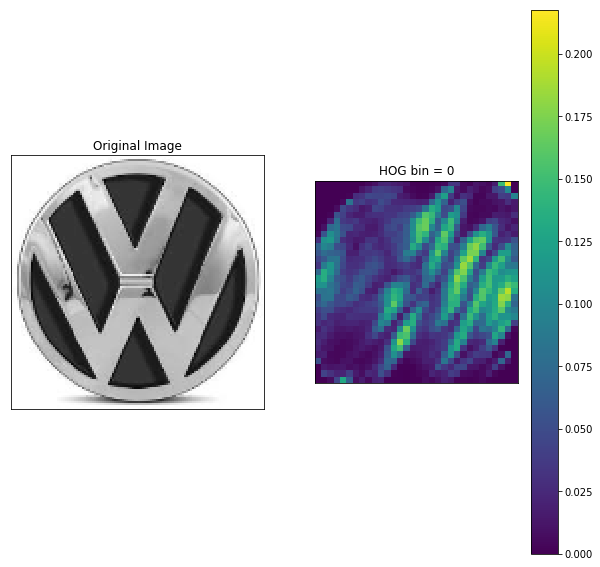

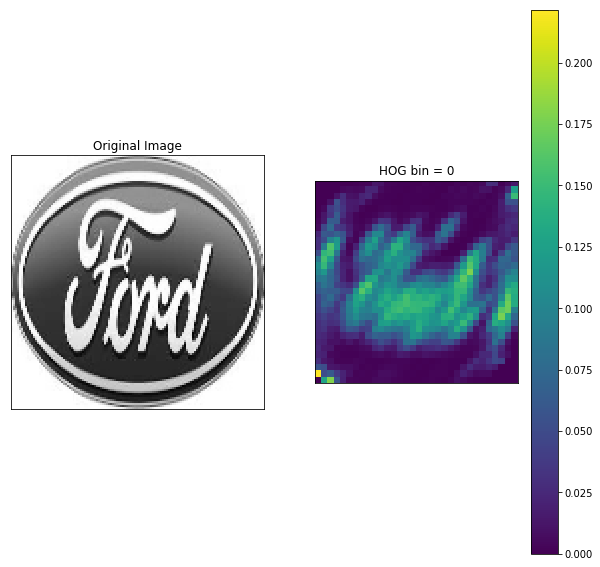

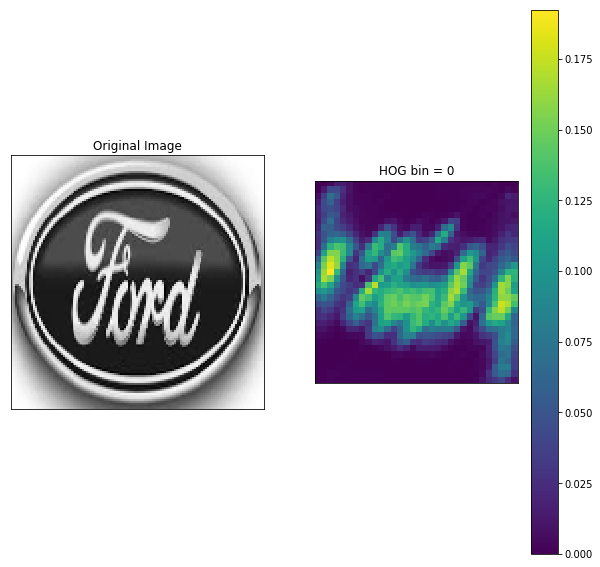

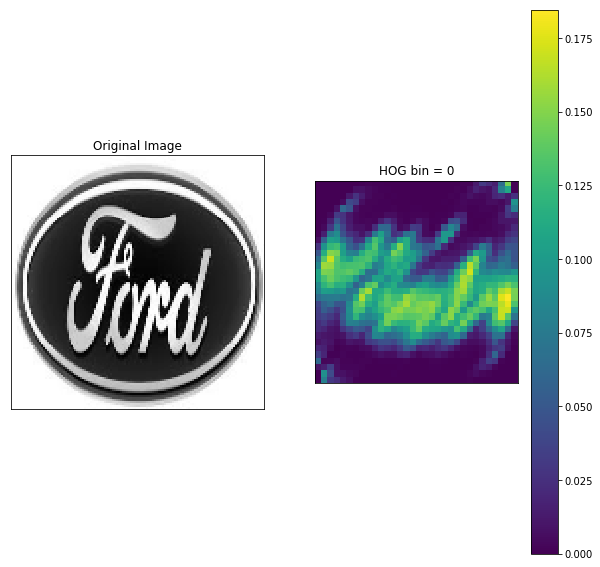

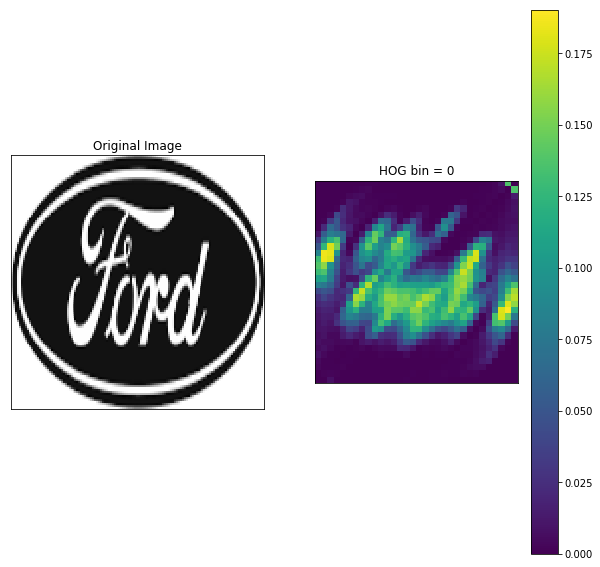

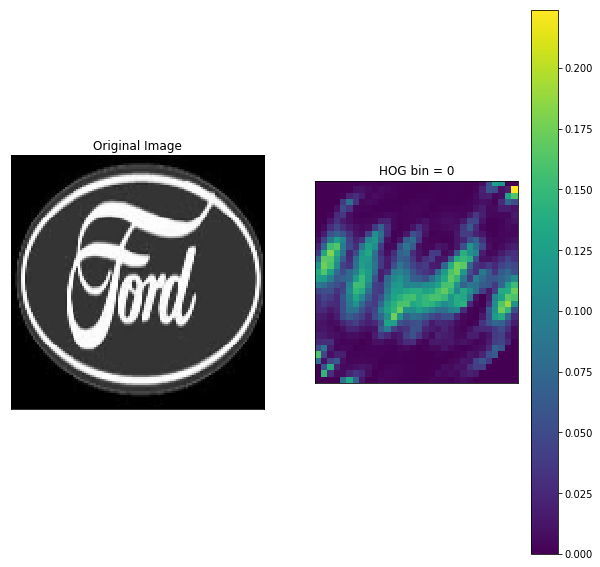

In [16]:
# compute the HoG features
""" HoG Features """
def hogFeatures(img, cell_size, block_size, nbins):
    """
    Find all the HoG features of an image.
    :param img: image
    :param cell_size: Tuple of size of the cell in pixels 
    :param block_size: Tuple of the size of a block in cells
    :param nbins: Integer of the number of oriantation bins
    :return: gradient
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # create the HoG object
    # winSize is the size of the image cropped to an multiple of the cell size
    hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

    n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
    
    # Compute HoG features
    hog_feats = hog.compute(img)\
                   .reshape(n_cells[1] - block_size[1] + 1,
                            n_cells[0] - block_size[0] + 1,
                            block_size[0], block_size[1], nbins) \
                   .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
    # hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
    # Indexing is by rows then columns.
    
    # computation for BlockNorm
    gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feats[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1
    gradients /= cell_count

    return gradients

cell_size = (4, 4)  # h x w in pixels
block_size = (4, 4) # h x w in cells
nbins = 8 # number of orientation bins

# list of all the gradients together
hog_gradients = list()
img_names = list()

volks_HoG = list()
for volks in volks_train:
    temp = hogFeatures(volks, cell_size, block_size, nbins)
    volks_HoG = (volks, temp)
    hog_gradients.append(temp)
    img_names.append(-1)
    
    # Preview
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(volks_HoG[0], cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.title("Original Image"), plt.xticks([]), plt.yticks([])
    bin = 0  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(volks_HoG[1][:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin = 0"), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
ford_HoG = list()
for ford in ford_train:
    temp = hogFeatures(ford, cell_size, block_size, nbins)
    ford_HoG = (ford, temp)
    hog_gradients.append(temp)
    img_names.append(1)
    
    # Preview
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(ford_HoG[0], cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.title("Original Image"), plt.xticks([]), plt.yticks([])
    bin = 0  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(ford_HoG[1][:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin = 0"), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    



##### Q3 - Fit a nearest neighbour classifier 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the classifier
neighbours = KNeighborsClassifier()

# reshape the training features to be 1D
hog_gradients = np.asarray(hog_gradients)
hog_gradients = hog_gradients.reshape(10, -1)

neighbours.fit(hog_gradients, img_names)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Testing
##### Q1 - Resize Images 

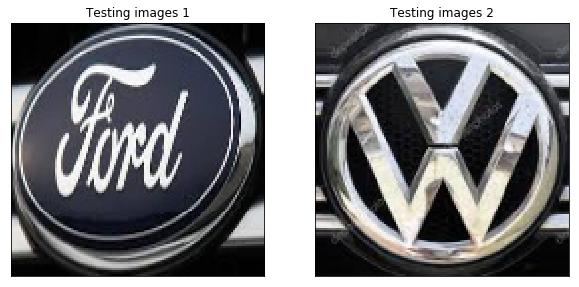

In [18]:
test_img = list()
test_img.append(cv2.resize(cv2.imread('./dataset/ford_test.jpeg'), (128, 128)))
test_img.append(cv2.resize(cv2.imread('./dataset/volks_test.jpeg'), (128, 128)))

plt.figure(figsize=(10,10))
subplot_i = 121
for i in range(len(test_img)):
    plt.subplot(subplot_i+i), plt.imshow(cv2.cvtColor(test_img[i], cv2.COLOR_BGR2RGB))
    index = i + 1
    plt.title('Testing images ' + str(index)), plt.xticks([]), plt.yticks([])
plt.show()

##### Q2 & Q3 - Compute the HoG of both test images and display them

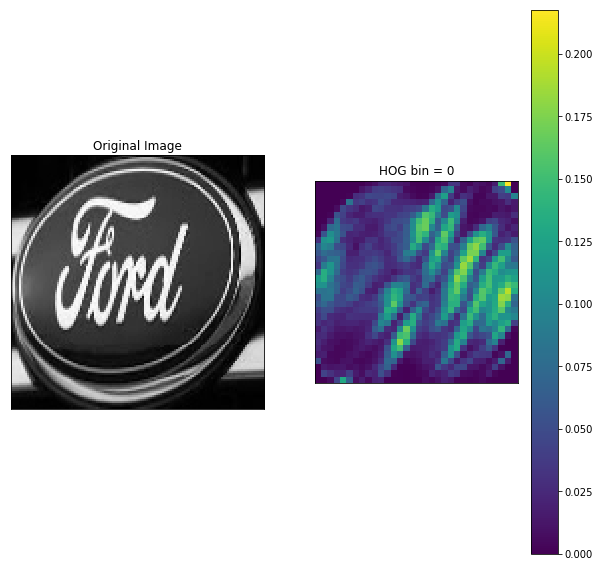

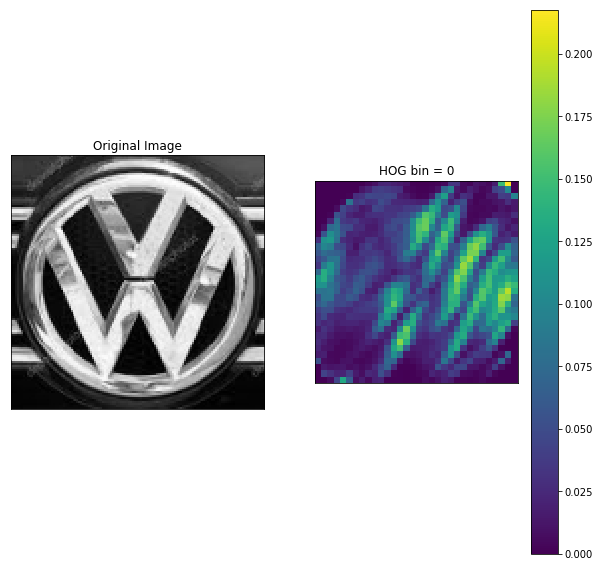

In [19]:
test_gradients = list()
for image in test_img:
    temp = hogFeatures(image, cell_size, block_size, nbins)
    test_gradients.append(temp)
    
    # Preview
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.title("Original Image"), plt.xticks([]), plt.yticks([])
    bin = 0  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(volks_HoG[1][:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin = 0"), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()

##### Q4 - Classify the test images using the classifier

In [20]:
# reshape the list to fi the dimensions
test_gradients = np.asarray(test_gradients)
test_gradients = test_gradients.reshape(test_gradients.shape[0], -1)
neighbours.predict(test_gradients)

# expect to have ford first then volkswagen second

array([ 1, -1])

#### Reasoning Questions 
##### Question 1 
Yes the HoG algorithm would be affected by the rotation in the image. Some computer vision techniques that would help are feature matching this would be matching the layouts of the gradients. This would allow for the image to determine the matching features then using the homography equation it can warp the image into a desired rotation that can be compared with the proper image.

##### Question 2
Since there are two directional lines, there would need to be only 2 gradients. There would be a gradient available to represene each one of the 45 degree lines spanning across the box. In order, to classify the 3 boxes it would be needed for the 2 gradients to be defined and simple classification can acknowledge the difference the 3 images.